Titanic Survival 

Adarsh Reddy Madur\
210050091

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I have removed the data that have NaN in relevant variables (undropped variables).

In [2]:
df = pd.read_csv('/Users/adarsh/Downloads/train.csv')
df1 = pd.read_csv('/Users/adarsh/Downloads/test.csv')

In [3]:
cond1 = (df['Sex'] == 'male')
cond2 = (df['Sex'] == 'female')
df.loc[cond1,'Sex'] = 1
df.loc[cond2,'Sex'] = 0
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


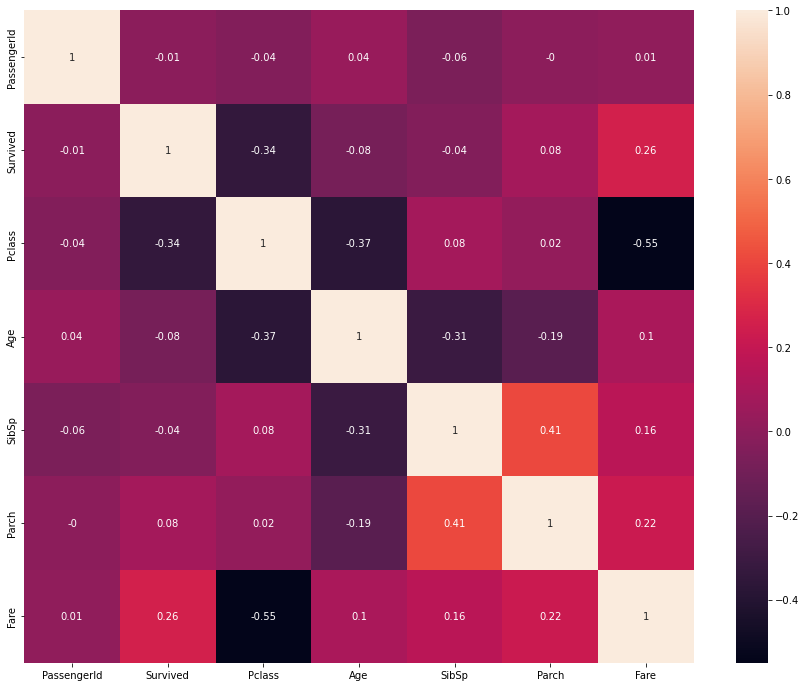

In [4]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(12)
cor = df.corr().round(2)
sns.heatmap(data=cor, annot = True)
plt.show()

In [5]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis =1)
X = X.dropna()
y = X['Survived']
X = X.drop(['Survived'], axis = 1)
X = X.reset_index(drop=True)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


I have assumed that place of boarding has no effect on survival.

In [6]:
y = y.to_numpy()
X = X.to_numpy()

In [7]:
class LogReg(object):
    
    def __init__(self, X, Y):
        '''X and Y have to be np arrays'''
        self.X = X                                   
        self.y = Y
        self.t0 = 0
        try:
            self.n = np.shape(self.X)[1]
        except:
            self.n = 1
        self.N = np.shape(self.y)[0]
        self.t = np.zeros(self.n)
        self.i = 0
        self.Xmin = np.array([])
        self.Xmax = np.array([])
        self.ymin = 0
        self.ymax = 0
        self.minmax()
        self.accuracy = np.array([])
        
    def minmax(self):
        for i in range (0, self.n):
            try:
                self.Xmin = np.append(self.Xmin, np.min(X[:, i]))
                self.Xmax = np.append(self.Xmax, np.max(X[:, i]))
            except:
                self.Xmin = np.append(self.Xmin, np.min(X))
                self.Xmax = np.append(self.Xmax, np.max(X))
        self.ymax = np.max(y)
        self.ymin = np.min(y)
        
    def normalize(self, x, b = False, is_y = False):
        if is_y and not b:
            return (x - self.ymin)/(self.ymax-self.ymin)
        elif not b:
            X = np.zeros(self.n)
            for i in range(0, self.n):
                try:
                    X[i] = (x[i] - self.Xmin[i])/(self.Xmax[i] - self.Xmin[i])
                except:
                    X = (x - self.Xmin)/(self.Xmax - self.Xmin)
            return X
        else:
            return (self.ymax-self.ymin)*x + self.ymin
        
    def h(self, X):
        try:
            a = self.t0 + np.matmul(np.transpose(self.t), X)
        except:
            a = self.t0 + self.t*X
        return 1/(1+np.exp(-a))
    
    def iterate(self, alpha):
        try:
            X = self.normalize(self.X[self.i,:])
        except:
            X = self.normalize(self.X[self.i])
        y = self.normalize(self.y[self.i], False, True)
        self.t0 += alpha*(y-self.h(X))
        self.t += alpha*(y-self.h(X))*X
        self.i += 1
        self.accuracy_train()
        
    def run(self, alpha, N):
        for i in range (0, N):
            self.iterate(alpha)
            
    def coefficients(self):
        return (self.t0, self.t)
    
    def accuracy_train(self):
        N = self.i
        P = 0
        for i in range (0, N):
            yp = 0
            try:
                yp = self.final_model(X[i,:])
            except:
                yp = self.final_model(X[i])
            if yp > 0.5:
                yp = 1
            else :
                yp = 0
            if self.y[i] == yp:
                P += 1
        A = P/N
        self.accuracy = np.append(self.accuracy, A)
        
    def final_model(self, x):
        return self.normalize(self.h(self.normalize(x)), True)
    
    def test_run(self, x):
        N = np.shape(x)[0]
        y_test = np.array([])
        for i in range (0, N):
            yp = 0
            try:
                yp = self.final_model(x[i,:])
            except:
                yp = self.final_model(x[i])
            if yp > 0.5:
                yp = 1
            else :
                yp = 0
            y_test = np.append(y_test, yp)  
        return y_test
    
    def plot_training_accuracy(self):
        f = plt.figure()
        f.set_figwidth(15)
        f.set_figheight(12)
        plt.plot(self.accuracy)
        plt.xlabel('Number of Iterations')
        plt.ylabel('Training Accuracy')

The class used above is very similar to that in Life expectancy (Q1).
Just the hypothesis and 2 member functions were changed.

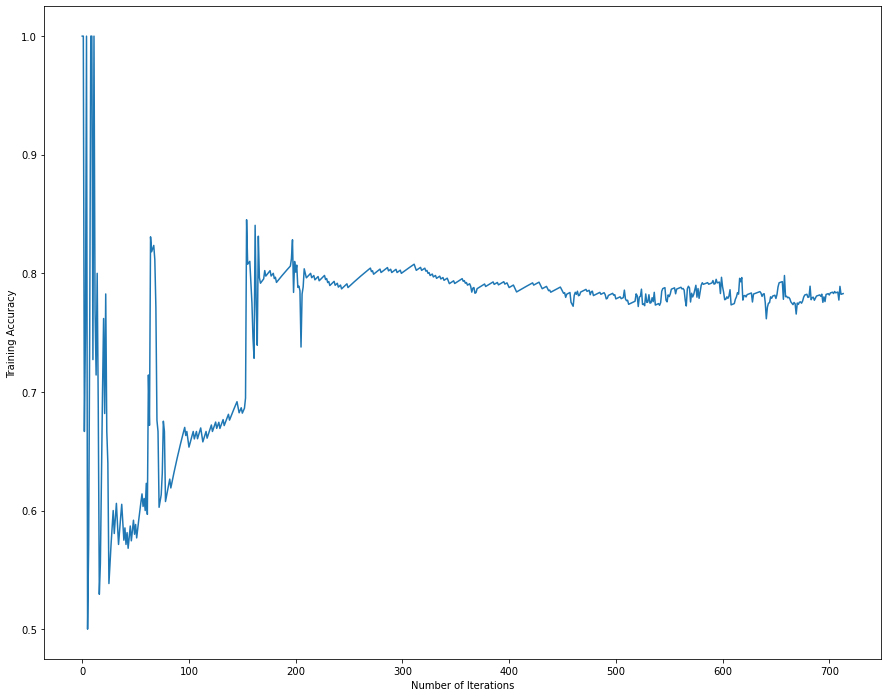

In [8]:
L = LogReg(X, y)
L.run(0.1, L.N)
L.plot_training_accuracy()

In [9]:
cond1 = (df1['Sex'] == 'male')
cond2 = (df1['Sex'] == 'female')
df1.loc[cond1,'Sex'] = 1
df1.loc[cond2,'Sex'] = 0
X1 = df1.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis =1)
X1 = X1.dropna()
PN = X1['PassengerId']
X1 = X1.drop(['PassengerId'], axis =1)
X1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [10]:
X1 = X1.to_numpy()
PN = PN.to_numpy()

In [11]:
data = {'PassengerID':PN, "prediction" : L.test_run(X1)}
Testdata = pd.DataFrame(data)
Testdata

,PassengerID,prediction
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
326,1301,1.0
327,1303,1.0
328,1304,1.0
329,1306,1.0


'Testdata' contains the final set of predictions of test.csv 